In [ ]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from  tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model 
from tensorflow.keras.utils import to_categorical , plot_model 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from  tensorflow.keras.applications import ResNet50
incept_model = ResNet50(include_top=True)
#incept_model.summary()

In [ ]:
from tensorflow.keras.models import Model 
last_layer = incept_model.layers[-2].output
res_net_model = Model(inputs=incept_model.input,outputs=last_layer)
#res_net_model.summary()

In [ ]:
##from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
##tokenizer = Tokenizer(oov_token="Other")

In [ ]:
import pickle
with open("/content/drive/MyDrive/MajorProject/MODELS/caption_tokenizer.pkl", "rb") as f:
  tokenizer = pickle.load(f)


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MajorProject/MODELS/caption_MODEL_1_RESNET_100.h5')

In [ ]:
max_len = 32

In [ ]:
def captionITWithImage(test_img):    

    #path = '/content/dog_2.jfif'
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    test_img = np.reshape(test_img, (1,224,224,3))

    test_feature = res_net_model.predict(test_img).reshape(1,2048)
        
    #test_img_path = path
    #test_img = cv2.imread(test_img_path, 1)
    #test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
      count += 1
      encoded = tokenizer.texts_to_sequences(text_inp)
      
      encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)
      prediction = np.argmax(new_model.predict([test_feature, encoded]))
      for k,v in tokenizer.word_index.items():
          if v == prediction:
              sampled_word = k
              break              
      
      if sampled_word == 'endofseq':
        break
    
      caption = caption + ' ' + sampled_word
            
      text_inp[0] += ' ' + sampled_word
    
    plt.figure()
    plt.imshow(test_img.reshape(224,224,3))
    plt.xlabel(caption)


    return caption

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
PATH = "/content/drive/MyDrive/MajorProject/DATASET/Images/dog_2.jfif"

In [ ]:
def crop_and_caption(PATH):
  
  img = cv2.imread(PATH)
  #cv2_imshow(img)
  primary_caption = captionITWithImage(img)

  img_crop1 = img[0:int(img.shape[0]/2), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop1)
  crop_caption1 = captionITWithImage(img_crop1)

  img_crop2 = img[0:int(img.shape[0]/2), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop2)
  crop_caption2 = captionITWithImage(img_crop2)

  img_crop3 = img[int(img.shape[0]/2):int(img.shape[0]), 0:int(img.shape[1]/2)]
  #cv2_imshow(img_crop3)
  crop_caption3 = captionITWithImage(img_crop3)

  img_crop4 = img[int(img.shape[0]/2):int(img.shape[0]), int(img.shape[1]/2):int(img.shape[1])]
  #cv2_imshow(img_crop4)
  crop_caption4 = captionITWithImage(img_crop4)

  img_crop5 = img[int(img.shape[0]/4):int(3*img.shape[0]/4), int(img.shape[1]/4):int(3*img.shape[1]/4)]
  #cv2_imshow(img_crop5)
  crop_caption5 = captionITWithImage(img_crop5)

  return primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5

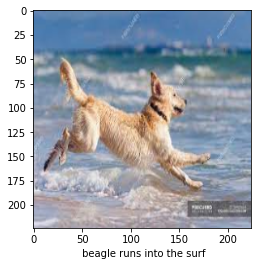

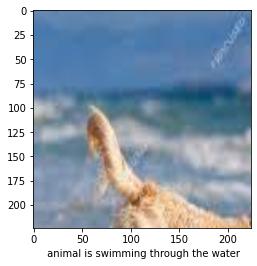

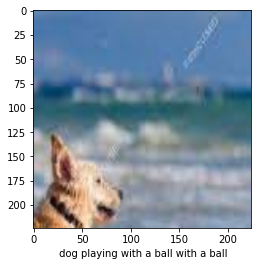

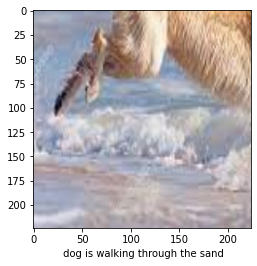

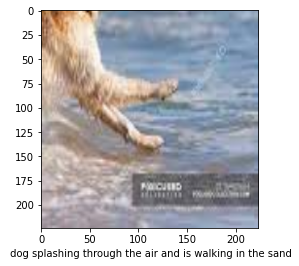

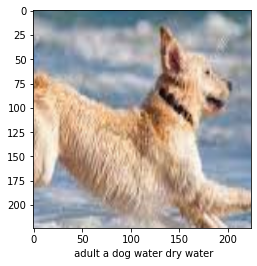

In [ ]:
primary_caption, crop_caption1, crop_caption2, crop_caption3, crop_caption4, crop_caption5 = crop_and_caption(PATH)

In [ ]:
primary_caption

' beagle runs into the surf'